# Sheet

# Frame the problem;
## This notebook presents the workflow to answer 2 questions:
## 1 Is there a correlation between the London weather data and crime data?
## 2 How will this knowledge help the government in implementing  crime o crime or weather policies?

# Import the needed modules and collect the raw data
## Our data are;
### The London Crime data
### The London weather Data
### The time span is from 2010 - 2021

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
crime_db = pd.read_csv("London_Crime_data.csv")

crime_db

,Major Text,Minor Text,Financial Year,"Month, Year of Month-Year",Type,Sum Value
0,Arson and Criminal Damage,Criminal Damage,fy10-11,April 2010,Sanction Detections,829
1,Arson and Criminal Damage,Arson,fy10-11,April 2010,Sanction Detections,25
2,Arson and Criminal Damage,Criminal Damage,fy10-11,April 2010,Offences,7281
3,Arson and Criminal Damage,Arson,fy10-11,April 2010,Offences,253
4,Arson and Criminal Damage,Criminal Damage,fy10-11,May 2010,Sanction Detections,774
...,...,...,...,...,...,...
14779,Violence Against the Person,Violence with Injury,fy20-21,March 2021,Sanction Detections,749
14780,Violence Against the Person,Homicide,fy20-21,March 2021,Sanction Detections,13
14781,Violence Against the Person,Violence without Injury,fy20-21,March 2021,Offences,13676
14782,Violence Against the Person,Violence with Injury,fy20-21,March 2021,Offences,5238


# Prepare the data for analysis
### Drop columns that are not needed
### Use the info() method to understand data structure and types
### Changed data types
### obtained unique categorical values
### Add a 'Offence_Alias' column to reduce the offence column string length
### Extracted month and year from date column
### Dropped duplicates


In [4]:
#Cleaning the data to drop columns we don't need and renaming columns for clarity

crime_db = crime_db.drop(columns=['Minor Text', 'Financial Year','Type'])
crime_db.rename(columns={'Major Text':'Offence','Month, Year of Month-Year':'Date'}, inplace=True)
crime_db

,Offence,Date,Sum Value
0,Arson and Criminal Damage,April 2010,829
1,Arson and Criminal Damage,April 2010,25
2,Arson and Criminal Damage,April 2010,7281
3,Arson and Criminal Damage,April 2010,253
4,Arson and Criminal Damage,May 2010,774
...,...,...,...
14779,Violence Against the Person,March 2021,749
14780,Violence Against the Person,March 2021,13
14781,Violence Against the Person,March 2021,13676
14782,Violence Against the Person,March 2021,5238


In [5]:
#Examine the data structure using the info() method, the object data type for the Date column suggests
#we have to change it to a date format in the next code cell. 
#Also, the output shows no null values.
crime_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14784 entries, 0 to 14783
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Offence    14784 non-null  object
 1   Date       14784 non-null  object
 2   Sum Value  14784 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 346.6+ KB


In [6]:
#changing the string column into a date format

crime_db['Date'] = crime_db['Date'].astype('datetime64[ns]')
crime_db['Date'] = crime_db['Date'].dt.to_period('M')
crime_db

,Offence,Date,Sum Value
0,Arson and Criminal Damage,2010-04,829
1,Arson and Criminal Damage,2010-04,25
2,Arson and Criminal Damage,2010-04,7281
3,Arson and Criminal Damage,2010-04,253
4,Arson and Criminal Damage,2010-05,774
...,...,...,...
14779,Violence Against the Person,2021-03,749
14780,Violence Against the Person,2021-03,13
14781,Violence Against the Person,2021-03,13676
14782,Violence Against the Person,2021-03,5238


In [7]:
#determine unique number of offences
unique_crime = len(crime_db.drop_duplicates("Offence"))
print("unique_crime=", unique_crime)

unique_crime= 12


In [8]:
list_unique_crime=crime_db.Offence.unique()
list_unique_crime

In [9]:
#Choose the first two letters of the Offence column string data and create a new column titled'Offence_Alias'


import re
def obtain_alias(Offence):
    outcome = re.search('[a-z][a-z]',Offence, re.IGNORECASE)
    if outcome:
        return outcome[0][0:5]
    return 'na'

crime_db['Offence_Alias'] = crime_db.Offence.map(obtain_alias)

print(crime_db.Offence_Alias.unique())

crime_db.tail()

['Ar' 'Bu' 'Dr' 'Hi' 'Mi' 'Po' 'Pu' 'Ro' 'Se' 'Th' 'Ve' 'Vi']


,Offence,Date,Sum Value,Offence_Alias
14779,Violence Against the Person,2021-03,749,Vi
14780,Violence Against the Person,2021-03,13,Vi
14781,Violence Against the Person,2021-03,13676,Vi
14782,Violence Against the Person,2021-03,5238,Vi
14783,Violence Against the Person,2021-03,10,Vi


In [10]:
#Extract month,year from date column
crime_db['month'] = crime_db['Date'].dt.strftime("%B")
crime_db['year'] = crime_db['Date'].dt.year
crime_db

,Offence,Date,Sum Value,Offence_Alias,month,year
0,Arson and Criminal Damage,2010-04,829,Ar,April,2010
1,Arson and Criminal Damage,2010-04,25,Ar,April,2010
2,Arson and Criminal Damage,2010-04,7281,Ar,April,2010
3,Arson and Criminal Damage,2010-04,253,Ar,April,2010
4,Arson and Criminal Damage,2010-05,774,Ar,May,2010
...,...,...,...,...,...,...
14779,Violence Against the Person,2021-03,749,Vi,March,2021
14780,Violence Against the Person,2021-03,13,Vi,March,2021
14781,Violence Against the Person,2021-03,13676,Vi,March,2021
14782,Violence Against the Person,2021-03,5238,Vi,March,2021


In [11]:
#drop duplicates; results shows about 3,098 duplicate rows where dropped
crime_db.info()
crime_db.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14784 entries, 0 to 14783
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   Offence        14784 non-null  object   
 1   Date           14784 non-null  period[M]
 2   Sum Value      14784 non-null  int64    
 3   Offence_Alias  14784 non-null  object   
 4   month          14784 non-null  object   
 5   year           14784 non-null  int64    
dtypes: int64(2), object(3), period[M](1)
memory usage: 693.1+ KB


,Offence,Date,Sum Value,Offence_Alias,month,year
0,Arson and Criminal Damage,2010-04,829,Ar,April,2010
1,Arson and Criminal Damage,2010-04,25,Ar,April,2010
2,Arson and Criminal Damage,2010-04,7281,Ar,April,2010
3,Arson and Criminal Damage,2010-04,253,Ar,April,2010
4,Arson and Criminal Damage,2010-05,774,Ar,May,2010
...,...,...,...,...,...,...
14779,Violence Against the Person,2021-03,749,Vi,March,2021
14780,Violence Against the Person,2021-03,13,Vi,March,2021
14781,Violence Against the Person,2021-03,13676,Vi,March,2021
14782,Violence Against the Person,2021-03,5238,Vi,March,2021


# Explore the data:
### Obtain the summary statistics of the data using the describe() method
### Plotted a histogram to visualize the distribution
### Plotted a QQ plot to further investigate if data is normally distributed
### Obtained the p value hypothesis test result for a normal distribution 
### use the groupby function to align with the project objective

In [12]:
##show data statistics; result shows a mean of Sum Value which is greater than the mean,
#suggesting a positive skewness where there are more counts of lower values.
#Standard deviation is far from the mean, suggesting we have outliers which might be significant or not
#A histogram plot helps with visualization in the next code cell
#crime_db.describe()
crime_db['Sum Value'].describe()

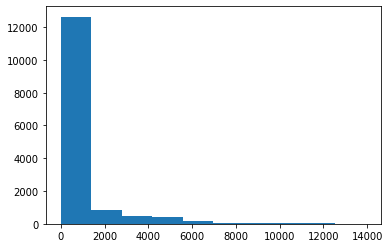

In [13]:
#plot histogram: data is a normal distribution with positive skewness
plt.hist(crime_db['Sum Value'], bins=10);

In [14]:
# A QQ visualization to validate normalcy: the plot shows that the data aligns well with the tails of the plot.
#This further strengthens our hypothesis of a normally distributed data
#This means we can make inferences from our data
#The hypothesis test for a normal distribution is done in the next code cell

# import statsmodels.api as sm
# from scipy.stats import norm
# import pylab


# crime_db = norm.rvs(size=1000)
# sm.qqplot(crime_db,line='45' )
# pylab.show

In [15]:
# #A statistic test for normalcy; A p value greater than 0.05 rejects the hypothesis that data is not normal
# from scipy.stats import kstest, norm
# crime_db = norm.rvs(size=1000)
# ks_statistic, p_value = kstest(crime_db, 'norm')
# print(ks_statistic, p_value)

In [16]:
#Summing up the offences into one value and saving a copy

total_sum = crime_db.groupby(['Date','Offence']).sum()
total_sum = total_sum.rename(columns={"year":"Year Total"})
total_sum.to_csv('Summed_Crimedb.csv')

print(total_sum)

                                              Sum Value  Year Total
Date    Offence                                                    
2010-04 Arson and Criminal Damage                  8388        8040
        Burglary                                   7988        8040
        Drug Offences                              9489        8040
        Historical Fraud and Forgery               2120        4020
        Miscellaneous Crimes Against Society       1030       96480
...                                                 ...         ...
2021-03 Robbery                                    1909        8084
        Sexual Offences                            2281        8084
        Theft                                     11969       16168
        Vehicle Offences                           8484       16168
        Violence Against the Person               20767       12126

[1584 rows x 2 columns]


In [17]:
#changing the date format

crime2 = pd.read_csv("Summed_Crimedb.csv")
crime2['Date'] = pd.to_datetime(crime2['Date'], format='%Y/%m/%d')

crime2.dtypes


[Text(0.5, 1.0, '2010 London Crime')]

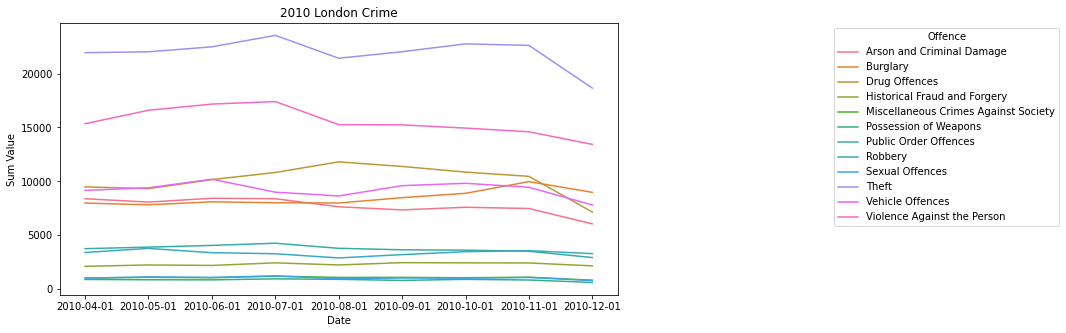

In [18]:

df= pd.read_csv("2010_Crime.csv")
plt.rcParams["figure.figsize"] = [10, 5]

lp = sns.lineplot('Date', 'Sum Value', ci=None, 
             hue='Offence', data=df)
lp.legend(loc='upper right',bbox_to_anchor = (1.8,1),title = "Offence")
lp.set(title = "2010 London Crime")

In [19]:
#bringing two date columns into one combined column

weather = pd.read_csv("Weather_db2_clean.csv",parse_dates= {"Date" : ["date","Month"]})
print(weather)

weather = weather.rename(columns={"mean_temp": "Mean Temperature", "precipitation": "Precipitation"}) #Making the data reusable

weather = weather.drop(weather.filter(regex="Unnamed"),axis=1, inplace=False) #Removes redundant generated column


weather

           Date  Unnamed: 0  mean_temp  precipitation
0    2010-04-01       11414        7.7            9.8
1    2010-04-01       11415        8.0            1.2
2    2010-04-01       11416        9.0            0.0
3    2010-04-01       11417        8.9            0.0
4    2010-04-01       11418       10.9            0.0
...         ...         ...        ...            ...
3922 2020-12-01       15336        7.5            2.0
3923 2020-12-01       15337        1.1            0.2
3924 2020-12-01       15338        2.6            0.0
3925 2020-12-01       15339        2.7            0.0
3926 2020-12-01       15340       -0.8            0.0

[3927 rows x 4 columns]


,Date,Mean Temperature,Precipitation
0,2010-04-01,7.7,9.8
1,2010-04-01,8.0,1.2
2,2010-04-01,9.0,0.0
3,2010-04-01,8.9,0.0
4,2010-04-01,10.9,0.0
...,...,...,...
3922,2020-12-01,7.5,2.0
3923,2020-12-01,1.1,0.2
3924,2020-12-01,2.6,0.0
3925,2020-12-01,2.7,0.0


# Indepth Analysis
### Merge data

In [21]:
#merging the data together

merge= pd.merge(weather,crime2, how="inner",on="Date")
merge.dropna(inplace=True)
merge.drop_duplicates()
merge.to_csv('Merged.csv')
# print (merge[merge.Precipitation.isnull()])
merge

,Date,Mean Temperature,Precipitation,Offence,Sum Value,Year Total
0,2010-04-01,7.7,9.8,Arson and Criminal Damage,8388,8040
1,2010-04-01,7.7,9.8,Burglary,7988,8040
2,2010-04-01,7.7,9.8,Drug Offences,9489,8040
3,2010-04-01,7.7,9.8,Historical Fraud and Forgery,2120,4020
4,2010-04-01,7.7,9.8,Miscellaneous Crimes Against Society,1030,96480
...,...,...,...,...,...,...
47119,2020-12-01,-0.8,0.0,Robbery,2183,8080
47120,2020-12-01,-0.8,0.0,Sexual Offences,1509,8080
47121,2020-12-01,-0.8,0.0,Theft,13821,16160
47122,2020-12-01,-0.8,0.0,Vehicle Offences,7867,16160


In [65]:
mean_vals = merge.loc[merge['Mean Temperature'] ==12.1]
mean_vals

,Date,Mean Temperature,Precipitation,Offence,Sum Value,Year Total
4884,2011-05-01,12.1,0.0,Arson and Criminal Damage,7611,8044
4885,2011-05-01,12.1,0.0,Burglary,9072,8044
4886,2011-05-01,12.1,0.0,Drug Offences,9862,8044
4887,2011-05-01,12.1,0.0,Historical Fraud and Forgery,2141,4022
4888,2011-05-01,12.1,0.0,Miscellaneous Crimes Against Society,1002,96528
...,...,...,...,...,...,...
46303,2020-10-01,12.1,21.0,Robbery,2663,8080
46304,2020-10-01,12.1,21.0,Sexual Offences,1892,8080
46305,2020-10-01,12.1,21.0,Theft,17523,16160
46306,2020-10-01,12.1,21.0,Vehicle Offences,10807,16160


In [22]:
merge.describe()

,Mean Temperature,Precipitation,Sum Value,Year Total
count,47016.000000,47016.000000,47016.000000,47016.000000
mean,12.156177,1.678637,6440.505424,18807.650502
std,5.658779,3.712695,6245.310626,24088.094393
min,-4.100000,0.000000,0.000000,4020.000000
25%,7.900000,0.000000,1330.000000,8056.000000
50%,12.050000,0.000000,4868.000000,10070.000000
75%,16.600000,1.600000,8387.000000,16136.000000
max,28.800000,51.600000,24677.000000,96960.000000


<AxesSubplot:>

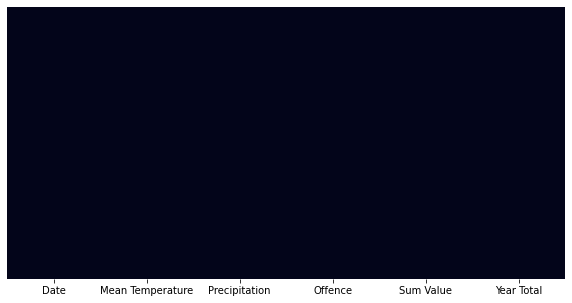

In [23]:
sns.heatmap(merge.isnull(),cbar=False,yticklabels=False) #Checking for missing values

In [24]:
merge.corr()

,Mean Temperature,Precipitation,Sum Value,Year Total
Mean Temperature,1.000000,-0.035105,0.016884,0.000033
Precipitation,-0.035105,1.000000,-0.002444,0.000023
Sum Value,0.016884,-0.002444,1.000000,-0.211409
Year Total,0.000033,0.000023,-0.211409,1.000000


<AxesSubplot:>

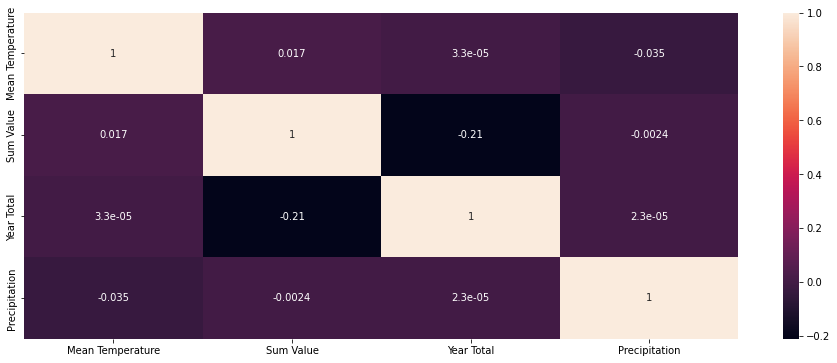

In [25]:
plt.figure(figsize=(16, 6))


#Quality correlation matrix

k = 4  # number of variables for heatmap
cols = merge.corr().nlargest(k, 'Mean Temperature')['Mean Temperature'].index
cm = merge[cols].corr()

sns.heatmap(cm, annot=True)

In [62]:
temp = merge.loc[merge['Sum Value'] == 24677.000000]
temp

,Date,Mean Temperature,Precipitation,Offence,Sum Value,Year Total
4737,2011-05-01,15.6,0.0,Theft,24677,16088
4749,2011-05-01,13.2,0.0,Theft,24677,16088
4761,2011-05-01,10.7,0.0,Theft,24677,16088
4773,2011-05-01,11.3,0.0,Theft,24677,16088
4785,2011-05-01,14.9,0.0,Theft,24677,16088
4797,2011-05-01,17.3,3.4,Theft,24677,16088
4809,2011-05-01,18.6,8.4,Theft,24677,16088
4821,2011-05-01,17.3,0.0,Theft,24677,16088
4833,2011-05-01,15.5,0.0,Theft,24677,16088
4845,2011-05-01,14.9,0.0,Theft,24677,16088


# Communicate Results

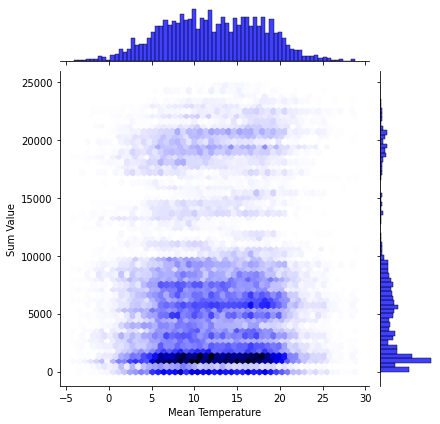

In [27]:
dataJointPlot = sns.jointplot(x='Mean Temperature', y='Sum Value', kind='hex', color='blue', data=merge)
plt.show()

It can be inferred that crime and temperature have no correlation from the data that we have found, and it can also be infered that crimes randomly occur as even in "normal" temperatures there is no distinct temperature where crimes happen and it is almost evenly distributed until you get to extreme temperatures although this may be difficult to prove true or false as the UK rarely reaches extreme temperatures so there is not a lot of data to show.

# Visualisations

[Text(0.5, 1.0, '2010 London Crime')]

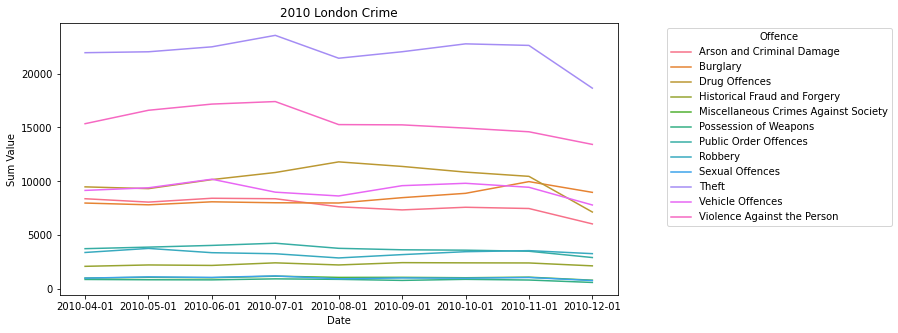

In [28]:
data= pd.read_csv("Merged.csv")
df= data[(data['Date'] >= '2010-01-01') & (data['Date'] < '2010-12-31')]

lp = sns.lineplot('Date', 'Sum Value', ci=None, 
             hue='Offence', data=df)

lp.legend(loc='upper right',bbox_to_anchor = (1.5,1),title = "Offence")
lp.set(title = "2010 London Crime")

[Text(0.5, 1.0, '2010 London Weather')]

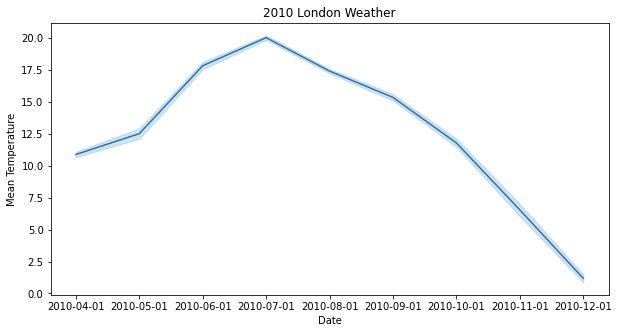

In [29]:
data= pd.read_csv('Merged.csv')
df= data[(data['Date'] >= '2010-01-01') & (data['Date'] < '2010-12-31')]
lp = sns.lineplot('Date', 'Mean Temperature',data=df)
lp.set(title = "2010 London Weather")

[Text(0.5, 1.0, '2011 London Crime')]

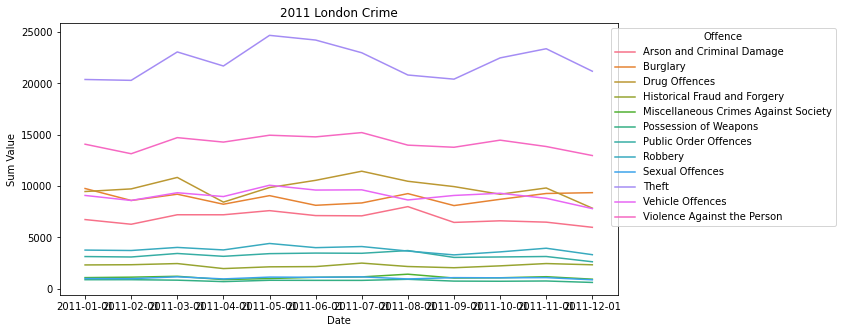

In [30]:
data= pd.read_csv('Merged.csv')
df= data[(data['Date'] >= '2011-01-01') & (data['Date'] < '2011-12-31')]

lp = sns.lineplot('Date', 'Sum Value', ci=None, 
             hue='Offence', data=df)
lp.legend(loc='upper right',bbox_to_anchor = (1.4,1),title = "Offence")
lp.set(title = "2011 London Crime")

[Text(0.5, 1.0, '2011 London Weather')]

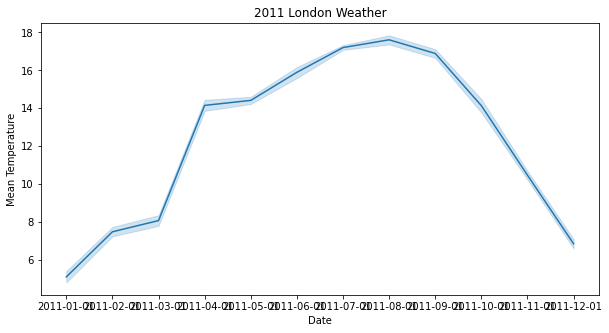

In [31]:
data= pd.read_csv('Merged.csv')
df= data[(data['Date'] >= '2011-01-01') & (data['Date'] < '2011-12-31')]
lp = sns.lineplot('Date', 'Mean Temperature',data=df)
lp.set(title = "2011 London Weather")

In [32]:
data= pd.read_csv('Merged.csv')
filtered2 = data[(data['Date'] >= '2012-01-01') & (data['Date'] < '2012-12-31')]

[Text(0.5, 1.0, '2012 London Crime')]

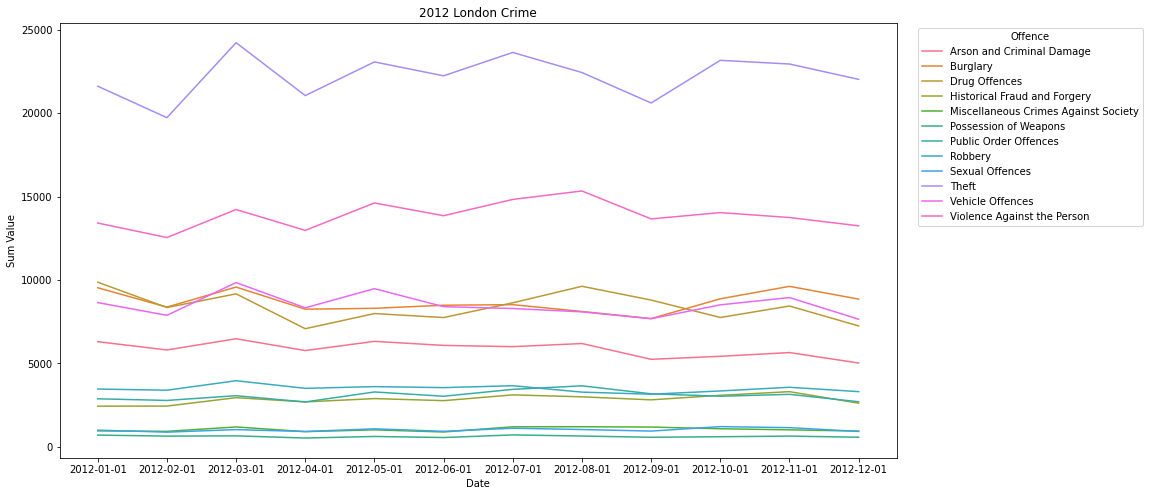

In [33]:
df= filtered2
plt.rcParams["figure.figsize"] = [15, 8]

lp = sns.lineplot('Date', 'Sum Value', ci=None, 
             hue='Offence', data=df)
lp.legend(loc='upper right',bbox_to_anchor = (1.3,1),title = "Offence")
lp.set(title = "2012 London Crime")

[Text(0.5, 1.0, '2012 London Weather')]

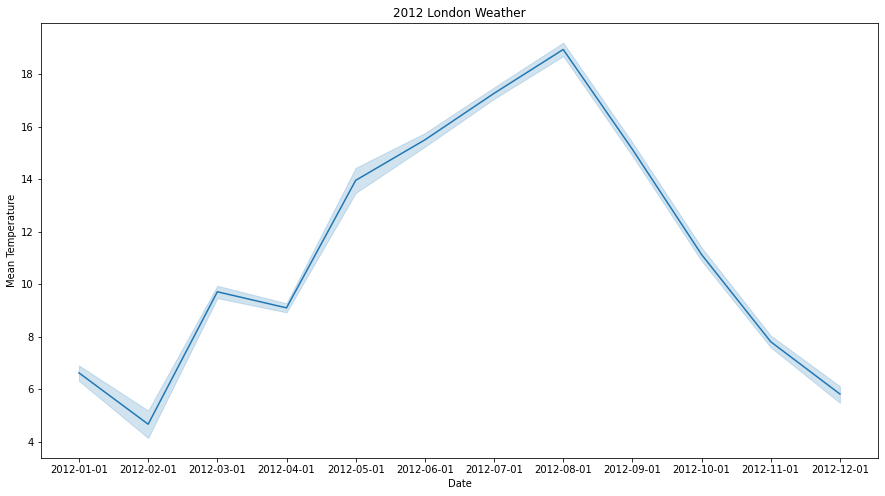

In [34]:
data= pd.read_csv('Merged.csv')
df= data[(data['Date'] >= '2012-01-01') & (data['Date'] < '2012-12-31')]
lp = sns.lineplot('Date', 'Mean Temperature',data=df)
lp.set(title = "2012 London Weather")

In [35]:
data= pd.read_csv('Merged.csv')
filtered3 = data[(data['Date'] >= '2013-01-01') & (data['Date'] < '2013-12-31')]

[Text(0.5, 1.0, '2013 London Crime')]

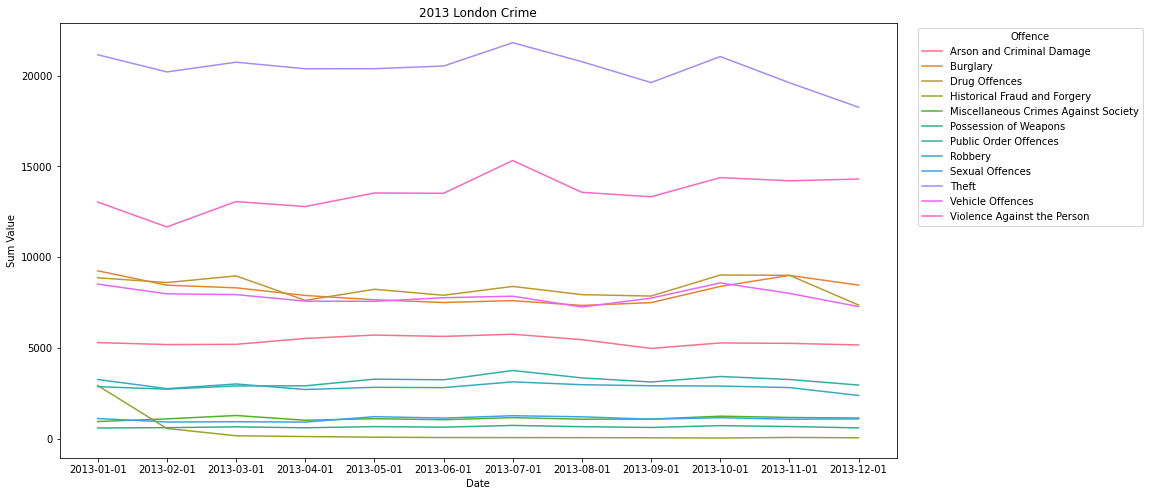

In [36]:
df= filtered3
plt.rcParams["figure.figsize"] = [15, 8]

lp = sns.lineplot('Date', 'Sum Value', ci=None, 
             hue='Offence', data=df)
lp.legend(loc='upper right',bbox_to_anchor = (1.3,1),title = "Offence")
lp.set(title = "2013 London Crime")

[Text(0.5, 1.0, '2013 London Weather')]

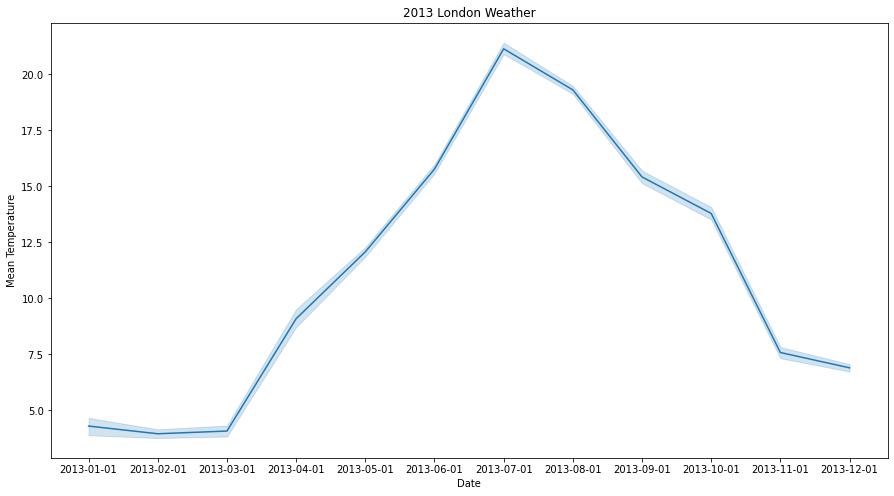

In [37]:
data= pd.read_csv('Merged.csv')
df= data[(data['Date'] >= '2013-01-01') & (data['Date'] < '2013-12-31')]
lp = sns.lineplot('Date', 'Mean Temperature',data=df)
lp.set(title = "2013 London Weather")

In [38]:
data= pd.read_csv('Merged.csv')
filtered4 = data[(data['Date'] >= '2014-01-01') & (data['Date'] < '2014-12-31')]

[Text(0.5, 1.0, '2014 London Crime')]

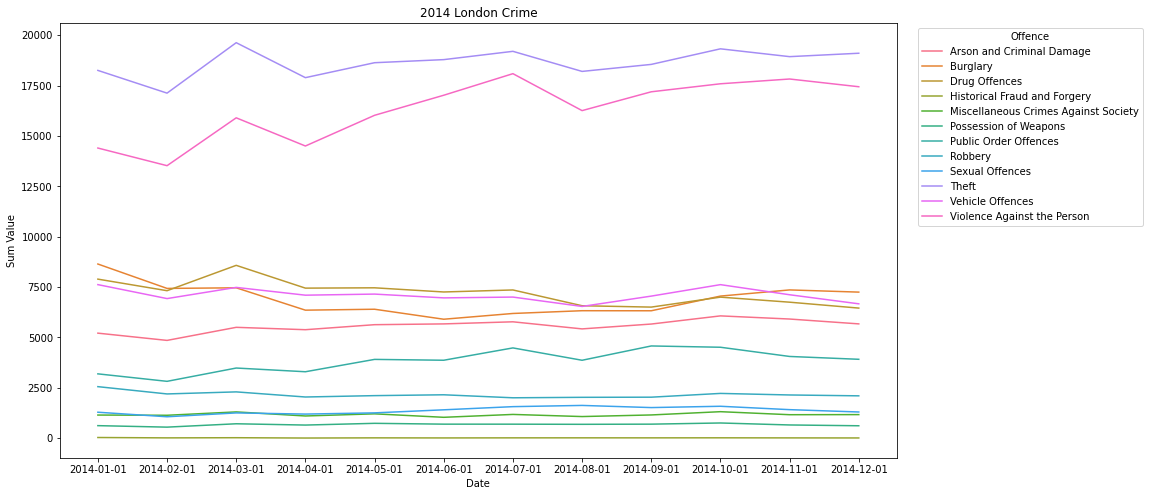

In [39]:
df= filtered4
plt.rcParams["figure.figsize"] = [15, 8]

lp = sns.lineplot('Date', 'Sum Value', ci=None, 
             hue='Offence', data=df)
lp.legend(loc='upper right',bbox_to_anchor = (1.3,1),title = "Offence")
lp.set(title = "2014 London Crime")

[Text(0.5, 1.0, '2014 London Weather')]

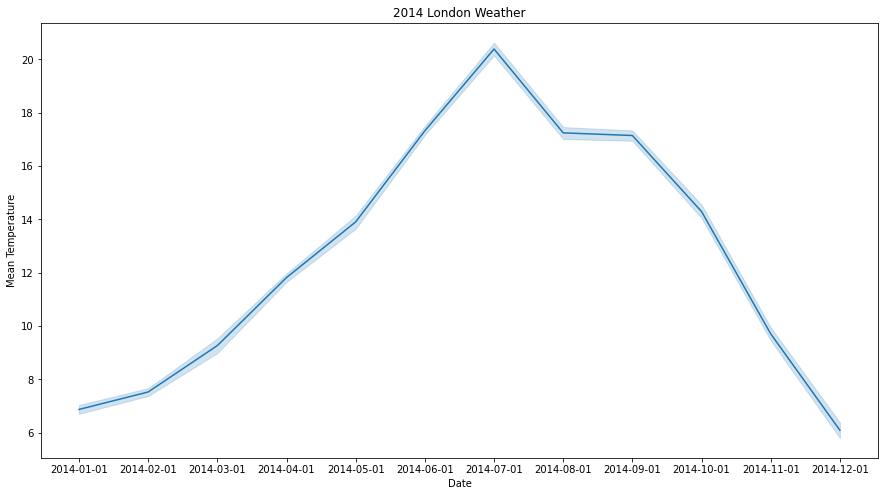

In [40]:
data= pd.read_csv('Merged.csv')
df= data[(data['Date'] >= '2014-01-01') & (data['Date'] < '2014-12-31')]
lp = sns.lineplot('Date', 'Mean Temperature',data=df)
lp.set(title = "2014 London Weather")

In [41]:
data= pd.read_csv('Merged.csv')
filtered5 = data[(data['Date'] >= '2015-01-01') & (data['Date'] < '2015-12-31')]

[Text(0.5, 1.0, '2015 London Crime')]

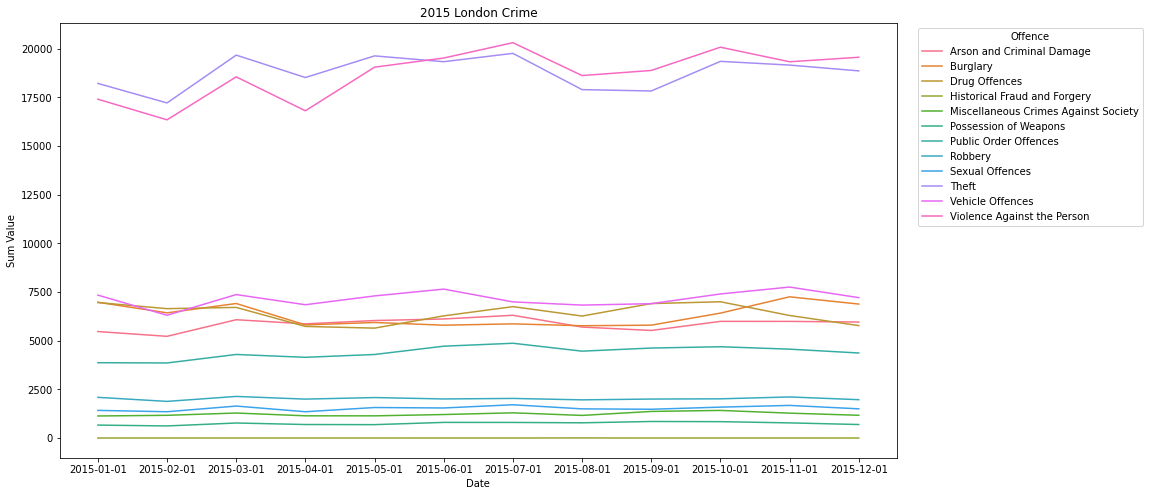

In [42]:
df= filtered5
plt.rcParams["figure.figsize"] = [15, 8]

lp = sns.lineplot('Date', 'Sum Value', ci=None, 
             hue='Offence', data=df)
lp.legend(loc='upper right',bbox_to_anchor = (1.3,1),title = "Offence")
lp.set(title = "2015 London Crime")

[Text(0.5, 1.0, '2015 London Weather')]

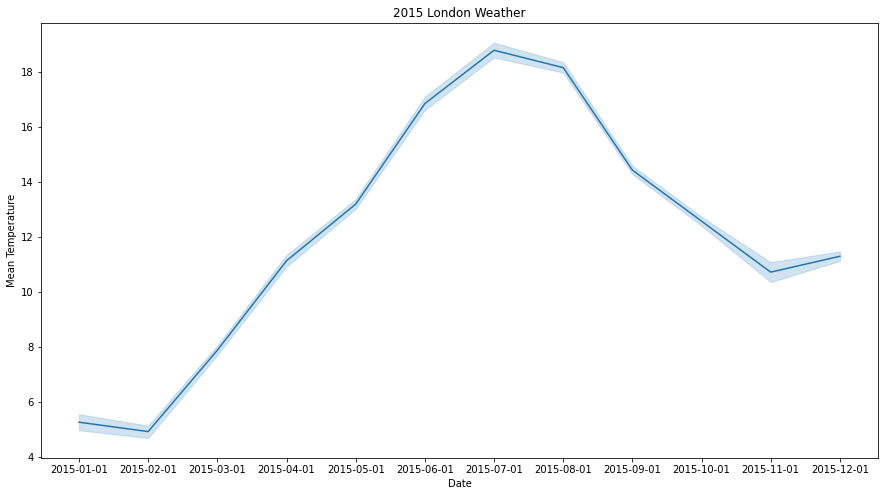

In [43]:
data= pd.read_csv('Merged.csv')
df= data[(data['Date'] >= '2015-01-01') & (data['Date'] < '2015-12-31')]
lp = sns.lineplot('Date', 'Mean Temperature',data=df)
lp.set(title = "2015 London Weather")

In [44]:
data= pd.read_csv('Merged.csv')
filtered6 = data[(data['Date'] >= '2016-01-01') & (data['Date'] < '2016-12-31')]

[Text(0.5, 1.0, '2016 London Crime')]

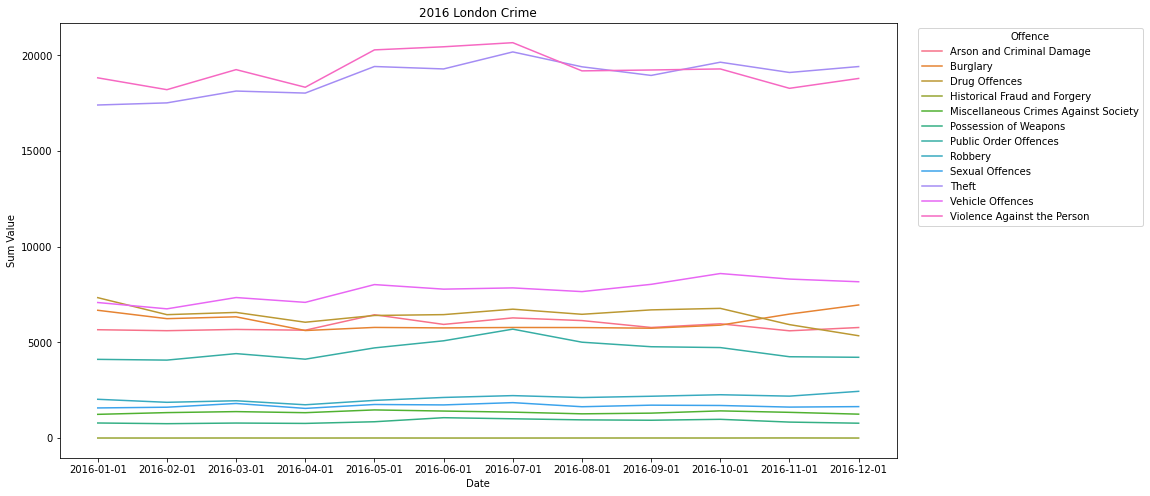

In [45]:
df= filtered6
plt.rcParams["figure.figsize"] = [15, 8]

lp = sns.lineplot('Date', 'Sum Value', ci=None, 
             hue='Offence', data=df)
lp.legend(loc='upper right',bbox_to_anchor = (1.3,1),title = "Offence")
lp.set(title = "2016 London Crime")

[Text(0.5, 1.0, '2016 London Weather')]

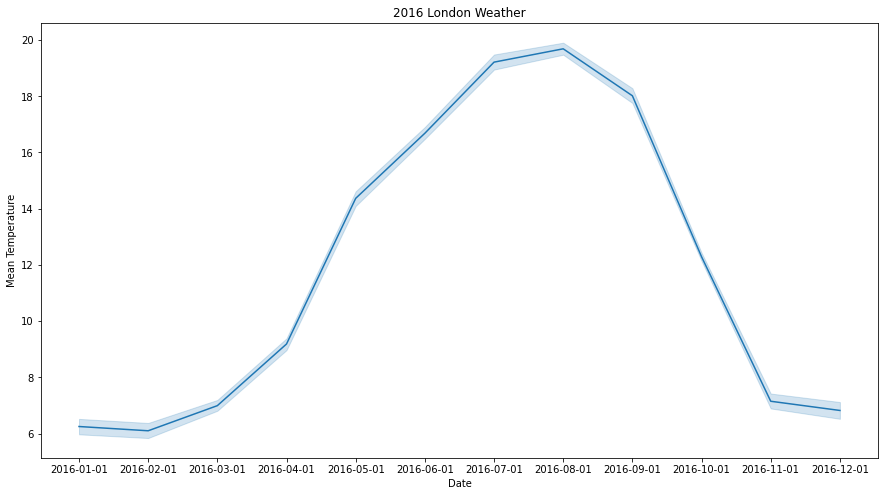

In [46]:
data= pd.read_csv('Merged.csv')
df= data[(data['Date'] >= '2016-01-01') & (data['Date'] < '2016-12-31')]
lp = sns.lineplot('Date', 'Mean Temperature',data=df)
lp.set(title = "2016 London Weather")

In [47]:
data= pd.read_csv('Merged.csv')
filtered7 = data[(data['Date'] >= '2017-01-01') & (data['Date'] < '2017-12-31')]

[Text(0.5, 1.0, '2017 London Crime')]

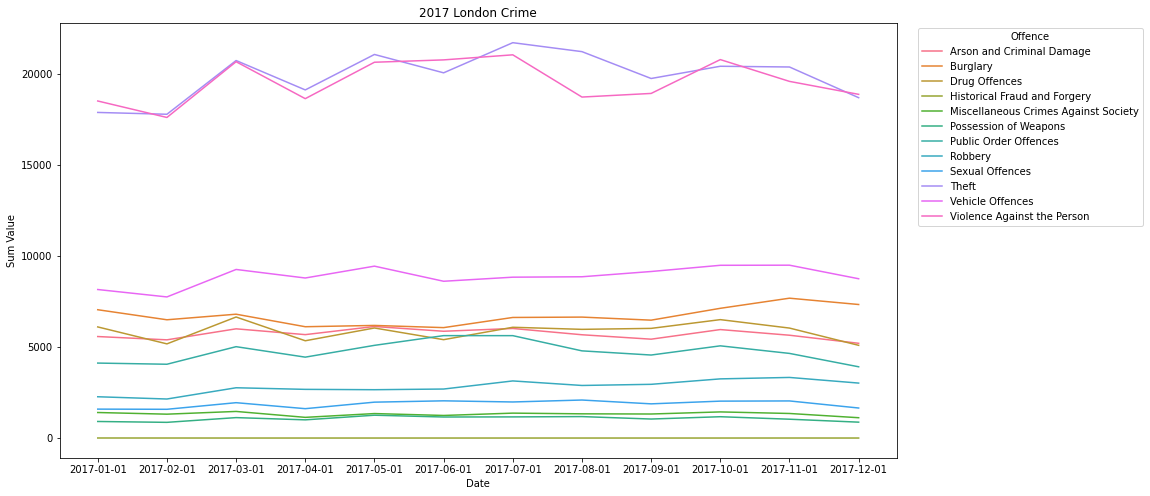

In [48]:
df= filtered7
plt.rcParams["figure.figsize"] = [15, 8]

lp = sns.lineplot('Date', 'Sum Value', ci=None, 
             hue='Offence', data=df)
lp.legend(loc='upper right',bbox_to_anchor = (1.3,1),title = "Offence")
lp.set(title = "2017 London Crime")

[Text(0.5, 1.0, '2017 London Weather')]

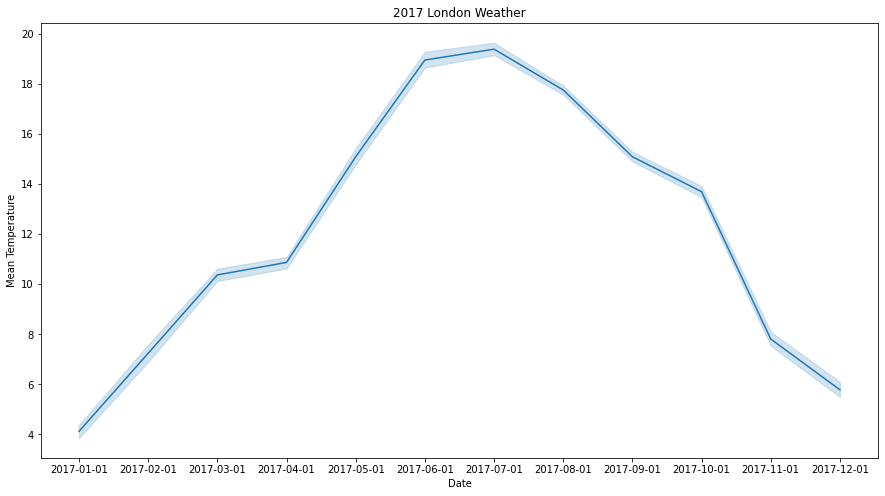

In [49]:
data= pd.read_csv('Merged.csv')
df= data[(data['Date'] >= '2017-01-01') & (data['Date'] < '2017-12-31')]
lp = sns.lineplot('Date', 'Mean Temperature',data=df)
lp.set(title = "2017 London Weather")

In [50]:
data= pd.read_csv('Merged.csv')
filtered8 = data[(data['Date'] >= '2018-01-01') & (data['Date'] < '2018-12-31')]

[Text(0.5, 1.0, '2018 London Crime')]

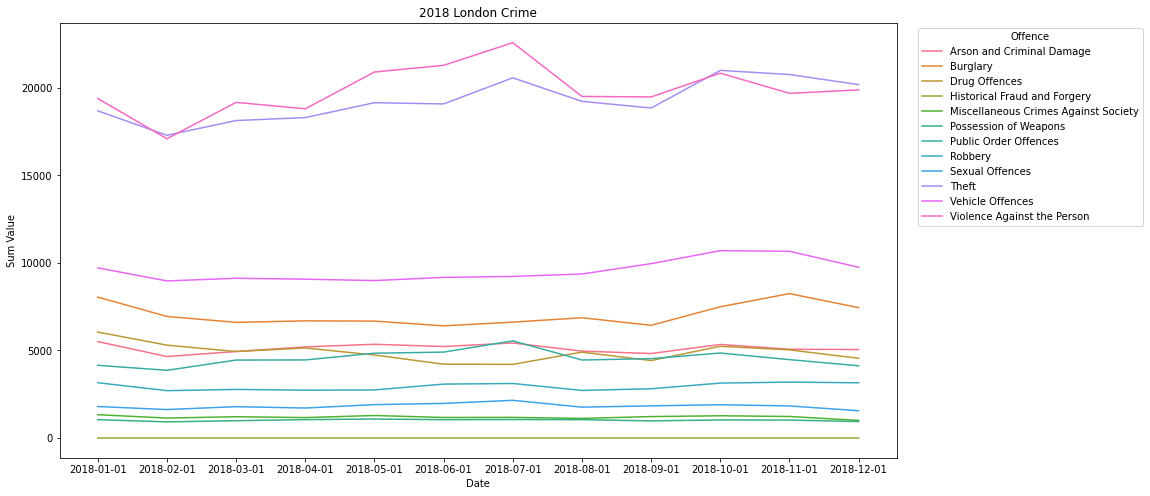

In [51]:
df= filtered8
plt.rcParams["figure.figsize"] = [15, 8]

lp = sns.lineplot('Date', 'Sum Value', ci=None, 
             hue='Offence', data=df)
lp.legend(loc='upper right',bbox_to_anchor = (1.3,1),title = "Offence")
lp.set(title = "2018 London Crime")

[Text(0.5, 1.0, '2018 London Weather')]

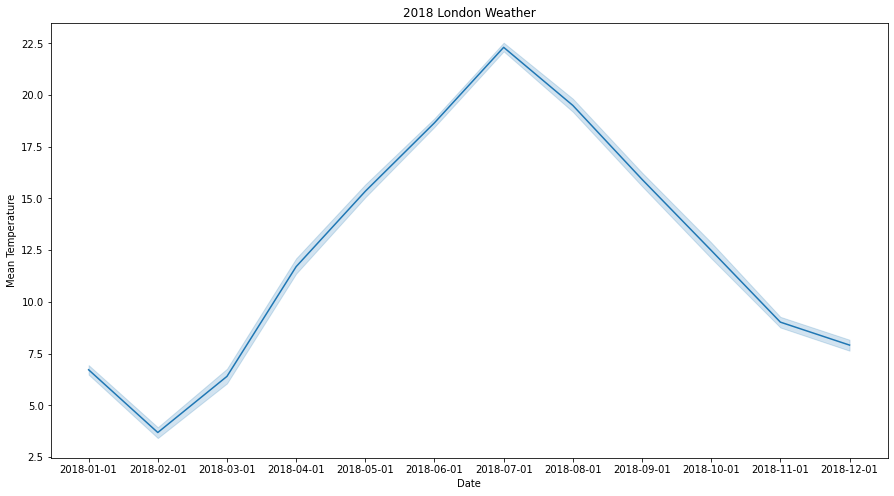

In [52]:
data= pd.read_csv('Merged.csv')
df= data[(data['Date'] >= '2018-01-01') & (data['Date'] < '2018-12-31')]
lp = sns.lineplot('Date', 'Mean Temperature',data=df)
lp.set(title = "2018 London Weather")

In [53]:
data= pd.read_csv('Merged.csv')
filtered9 = data[(data['Date'] >= '2019-01-01') & (data['Date'] < '2019-12-31')]

[Text(0.5, 1.0, '2019 London Crime')]

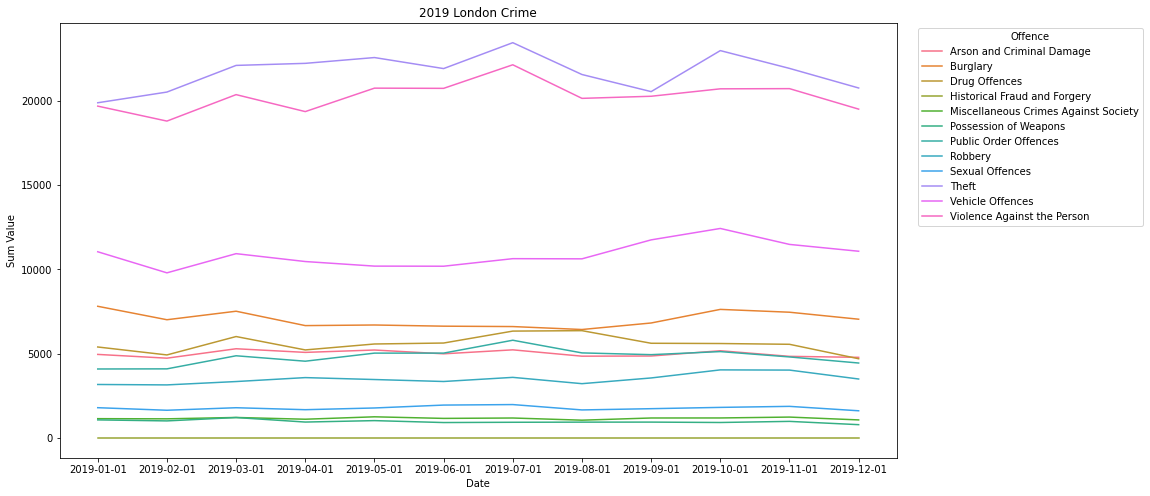

In [54]:
df= filtered9
plt.rcParams["figure.figsize"] = [15, 8]

lp = sns.lineplot('Date', 'Sum Value', ci=None, 
             hue='Offence', data=df)
lp.legend(loc='upper right',bbox_to_anchor = (1.3,1),title = "Offence")
lp.set(title = "2019 London Crime")

[Text(0.5, 1.0, '2019 London Weather')]

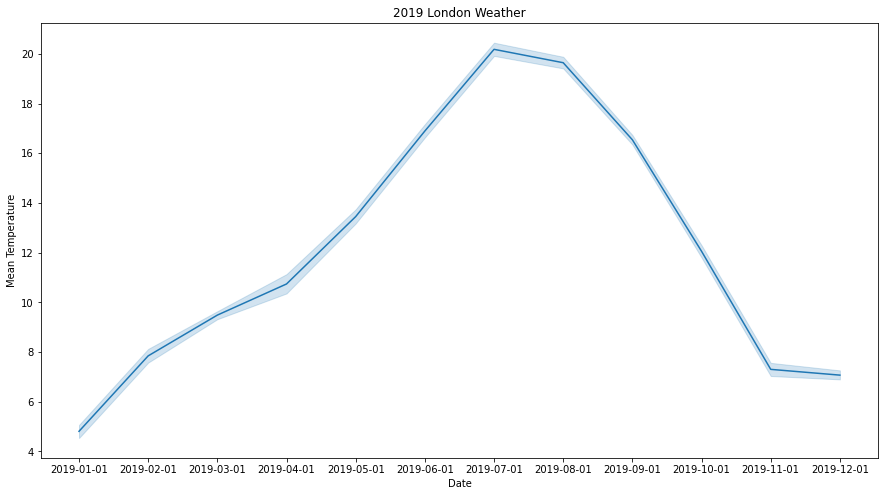

In [55]:
data= pd.read_csv('Merged.csv')
df= data[(data['Date'] >= '2019-01-01') & (data['Date'] < '2019-12-31')]
lp = sns.lineplot('Date', 'Mean Temperature',data=df)
lp.set(title = "2019 London Weather")

In [56]:
data= pd.read_csv('Merged.csv')
filtered10 = data[(data['Date'] >= '2020-01-01') & (data['Date'] < '2020-12-31')]

[Text(0.5, 1.0, '2020 London Crime')]

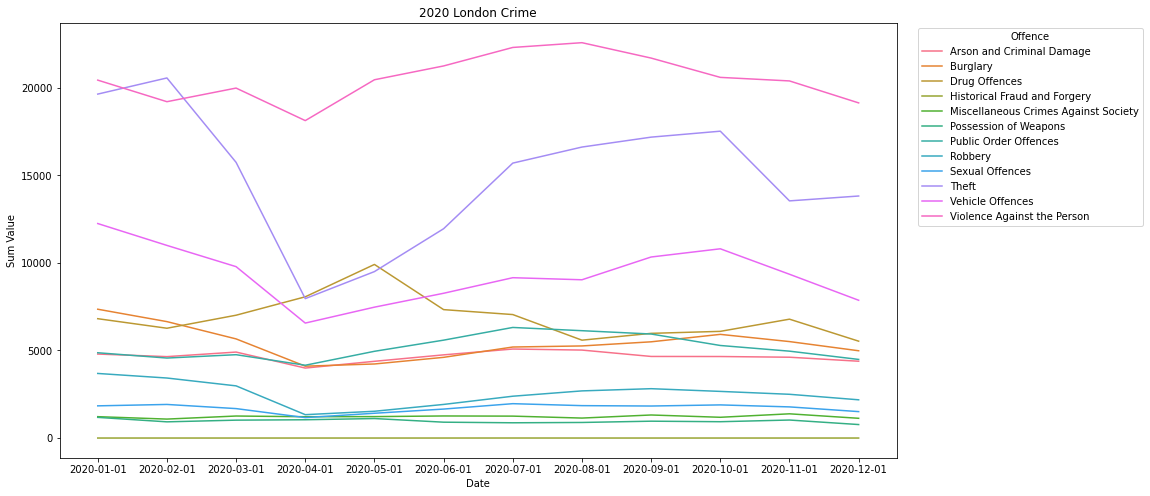

In [57]:
df= filtered10
plt.rcParams["figure.figsize"] = [15, 8]

lp = sns.lineplot('Date', 'Sum Value', ci=None, 
             hue='Offence', data=df)
lp.legend(loc='upper right',bbox_to_anchor = (1.3,1),title = "Offence")
lp.set(title = "2020 London Crime")

[Text(0.5, 1.0, '2020 London Weather')]

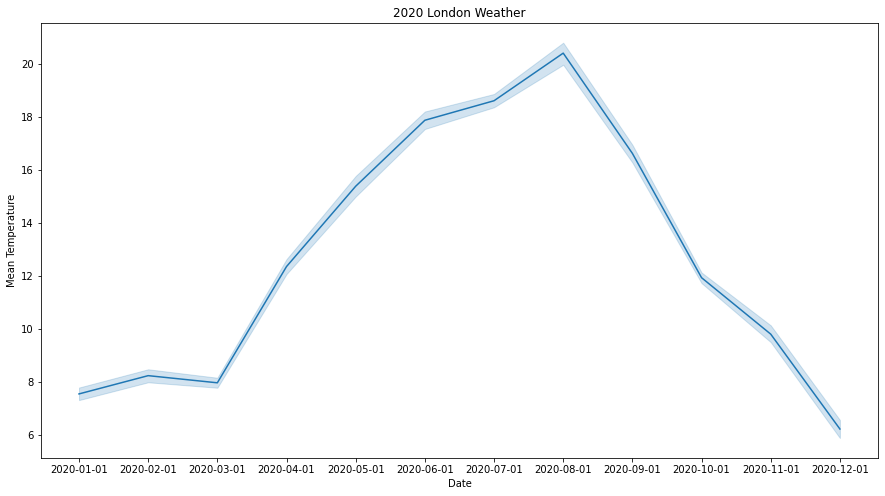

In [58]:
data= pd.read_csv('Merged.csv')
df= data[(data['Date'] >= '2020-01-01') & (data['Date'] < '2020-12-31')]
lp = sns.lineplot('Date', 'Mean Temperature',data=df)
lp.set(title = "2020 London Weather")